## **EXPLORATORY DATA ANALYSIS & DATA CLEANING**

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Lets explore the data

test_set_values = pd.read_csv('Test set values.csv')
training_set_labels = pd.read_csv('Training Set labels.csv')
training_set_values = pd.read_csv('Training set Values.csv')

## Handling missing values 

In [2]:
# Check for missing values in the training set values
print("Missing values in Training Set Values:")
print(training_set_values.isnull().sum())

# Check for missing values in the training set labels
print("\nMissing values in Training Set Labels:")
print(training_set_labels.isnull().sum())

# Check for missing values in the test set values
print("\nMissing values in Test Set Values:")
print(test_set_values.isnull().sum())

Missing values in Training Set Values:
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0


These missing values need to be addressed before using the test set for predictions or analysis.


In [3]:
from sklearn.impute import SimpleImputer

# Impute categorical columns with mode
categorical_cols = ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name', 'permit']
categorical_imputer = SimpleImputer(strategy='most_frequent')
training_set_values[categorical_cols] = categorical_imputer.fit_transform(training_set_values[categorical_cols])
test_set_values[categorical_cols] = categorical_imputer.fit_transform(test_set_values[categorical_cols])

# Impute non-categorical columns with a constant
non_categorical_cols = ['date_recorded', 'subvillage']
constant_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
training_set_values[non_categorical_cols] = constant_imputer.fit_transform(training_set_values[non_categorical_cols])
test_set_values[non_categorical_cols] = constant_imputer.fit_transform(test_set_values[non_categorical_cols])



Categorical columns are imputed with the most frequent value, while non-categorical columns have been imputed with a constant value of 'Missing'. This ensures that the dataset is ready for further analysis and modeling.

In [4]:
# Verify if missing values have been handled
print("\nMissing values after imputation in Training Set Values:")
print(training_set_values.isnull().sum())

print("\nMissing values after imputation in Test Set Values:")
print(test_set_values.isnull().sum())


Missing values after imputation in Training Set Values:
id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           

Here we see that there are no more missing values in both datasets

## Checking for duplicates

In [5]:
#Checking for Duplicates
def check_duplicates(*datasets):
    """
    Checks for duplicates in the provided datasets and prints the number of duplicates for each dataset.
    Assumes datasets are in a Pandas DataFrame format.
    """
    for idx, dataset in enumerate(datasets):
        num_duplicates = dataset.duplicated().sum()
        print(f"Number of duplicates in Dataset {idx + 1}: {num_duplicates}")

check_duplicates(test_set_values, training_set_labels, training_set_values)

Number of duplicates in Dataset 1: 0
Number of duplicates in Dataset 2: 0
Number of duplicates in Dataset 3: 0


There are no duplicates in out datasets

In [6]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')
training_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,Government Of Tanzania,0,DWE,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


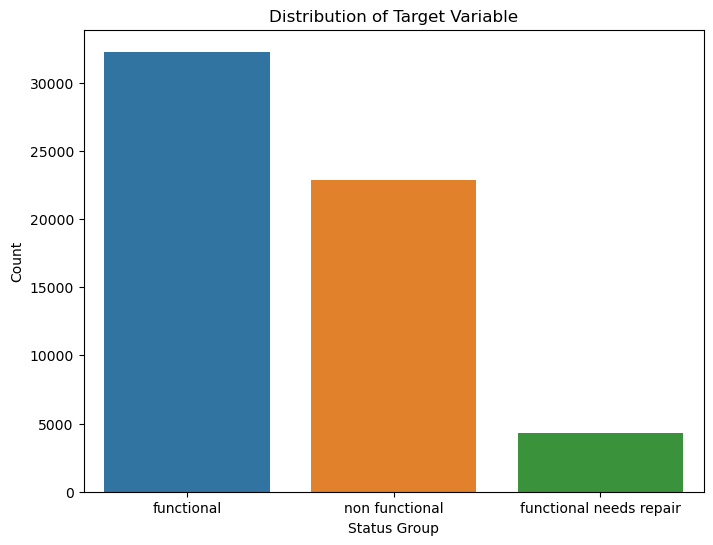

In [7]:
# Merge training set values and training set labels
training_df = pd.merge(training_set_values, training_set_labels, on='id')

# Explore the target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='status_group', data=training_df)
plt.title('Distribution of Target Variable')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()

Understanding the distribution of a target variable is important for model evaluation, identifying potential biases, and designing appropriate strategies for addressing imbalances if necessary.

   - The majority of the water pumps are labeled as 'functional' which suggests that a significant portion of the pumps in the dataset are in good working condition.

   - The category 'non-functional' has a considerable number of pumps, although less than the 'functional' ones. This indicates that there is a significant proportion of non-working or non-operational water pumps in the dataset.

   - The category 'functional needs repair' has the lowest count, indicating that there are relatively fewer pumps in the dataset that are functional but require repair.

This provides insights into the prevalence of different pump conditions, which can guide decision-making and resource allocation in addressing water pump functionality issues.


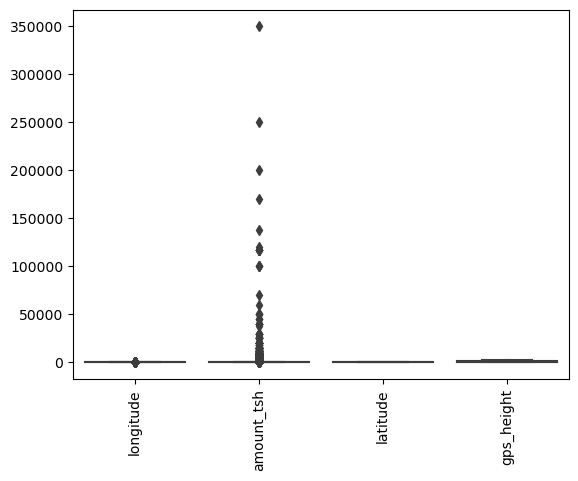

Number of outliers: 2050


In [8]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

# Plot box plots for numerical features

numerical_cols = ['longitude', 'amount_tsh', 'latitude', 'gps_height']

sns.boxplot(data=training_df[numerical_cols])

plt.xticks(rotation=90)

plt.show()

# Calculate z-scores for numerical features

z_scores = np.abs((training_df[numerical_cols] - training_df[numerical_cols].mean()) / training_df[numerical_cols].std())

# Identify outliers based on z-score threshold

z_score_threshold = 3

outliers = (z_scores > z_score_threshold).any(axis=1)

# Print the number of outliers

print("Number of outliers:", outliers.sum())



 - There are 2050 outliers in the dataset, primarily in the amount_tsh column. 

Lets analyze the relationship between the "water_quality" variable and the "status_group" variable (which represents the condition of the water point).

<Figure size 1000x600 with 0 Axes>

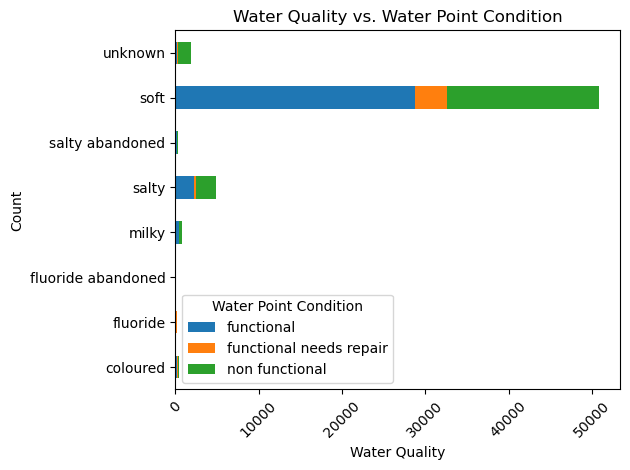

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by water quality and status group
grouped_data = training_df.groupby(['water_quality', 'status_group']).size().unstack()

# Plot a stacked bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='barh', stacked=True)
plt.xlabel('Water Quality')
plt.ylabel('Count')
plt.title('Water Quality vs. Water Point Condition')
plt.legend(title='Water Point Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Here we see that areas with soft water have more functional water pumps and also has a high  number of non functional water pumps compared to areas with different water quality

Lets observe the distribution of water point conditions across different water quality groups

<Figure size 1000x600 with 0 Axes>

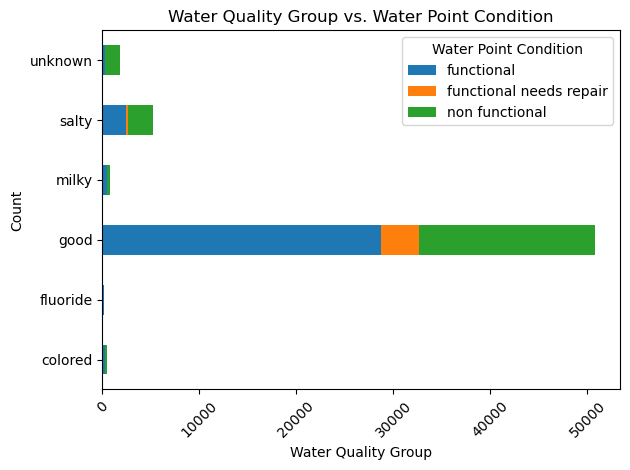

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by water quality group and status group
grouped_data = training_df.groupby(['quality_group', 'status_group']).size().unstack()

# Plot a stacked bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='barh', stacked=True)
plt.xlabel('Water Quality Group')
plt.ylabel('Count')
plt.title('Water Quality Group vs. Water Point Condition')
plt.legend(title='Water Point Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Here we see that areas with good quality of water have more water pumps both functional and non functional compared to other qualities of water. 

Lets also check if a water source affects the quality of water at a waterpoint and also determine whether the water pumps are functional or not in those areas

<Figure size 1000x600 with 0 Axes>

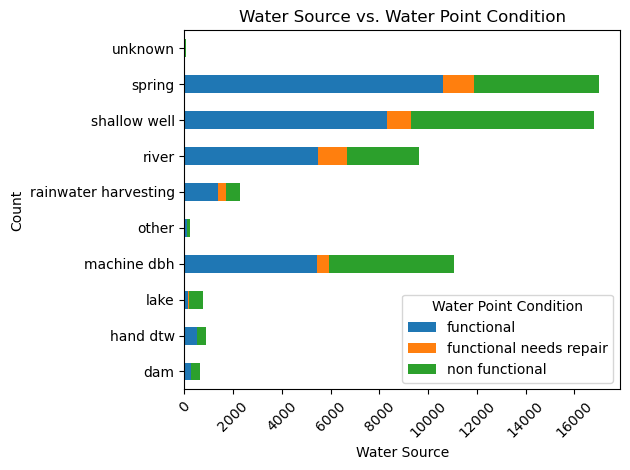

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by water source and status group
grouped_data = training_df.groupby(['source', 'status_group']).size().unstack()

# Plot a stacked bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='barh', stacked=True)
plt.xlabel('Water Source')
plt.ylabel('Count')
plt.title('Water Source vs. Water Point Condition')
plt.legend(title='Water Point Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 - Springs have more functional pumps  compared to a lake source. Also a shallow well has more non functional water pumps compared to a spring

 Lets check a the water basin near a water point has an impact on its condition.

<Figure size 1000x600 with 0 Axes>

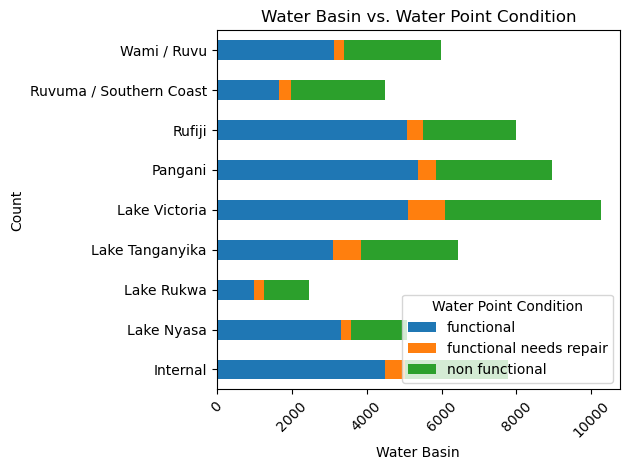

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by water basin and status group
grouped_data = training_df.groupby(['basin', 'status_group']).size().unstack()

# Plot a stacked bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='barh', stacked=True)
plt.xlabel('Water Basin')
plt.ylabel('Count')
plt.title('Water Basin vs. Water Point Condition')
plt.legend(title='Water Point Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Lake Victoria has the highest number of functional pumps and also the highest number of non functional pumps

Lets check if payment affects the condition of the waterpoint,

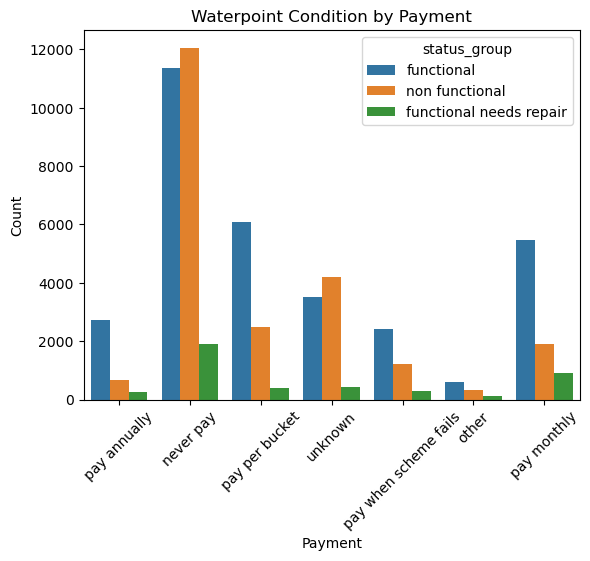

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
sns.countplot(x='payment', hue='status_group', data=training_df)

# Set the x-axis label
plt.xlabel('Payment')

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Waterpoint Condition by Payment')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


- Waterpoints that charge per annum and monthly have more functional pumps and less non fucntional ones compared to those do not charge which have more non functinal than functional pumps 